**Here we will train models**

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf
import pandas as pd
import ta  # module for technical indicators
import ta.momentum
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
path = "../../data/reg_dataset.csv"
df = pd.read_csv(path)

In [24]:
data = df

features = data.drop(columns=['Target'])
target = data['Target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

split_index = int(len(features_scaled) * 0.75)
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

In [25]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor MSE: {rf_mse}")

Random Forest Regressor MSE: 1.258301838098942


In [26]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Regressor MSE: {xgb_mse}")

XGBoost Regressor MSE: 1.1063619149767623


In [27]:
print(f"Random Forest Predictions: {rf_predictions[:5]}")
print(f"XGBoost Predictions: {xgb_predictions[:5]}")

Random Forest Predictions: [ 0.06077602 -0.01846761 -0.25837051 -0.09384267  0.00468455]
XGBoost Predictions: [ 0.02355446 -0.02170226 -0.08487547 -0.04731783 -0.05991674]


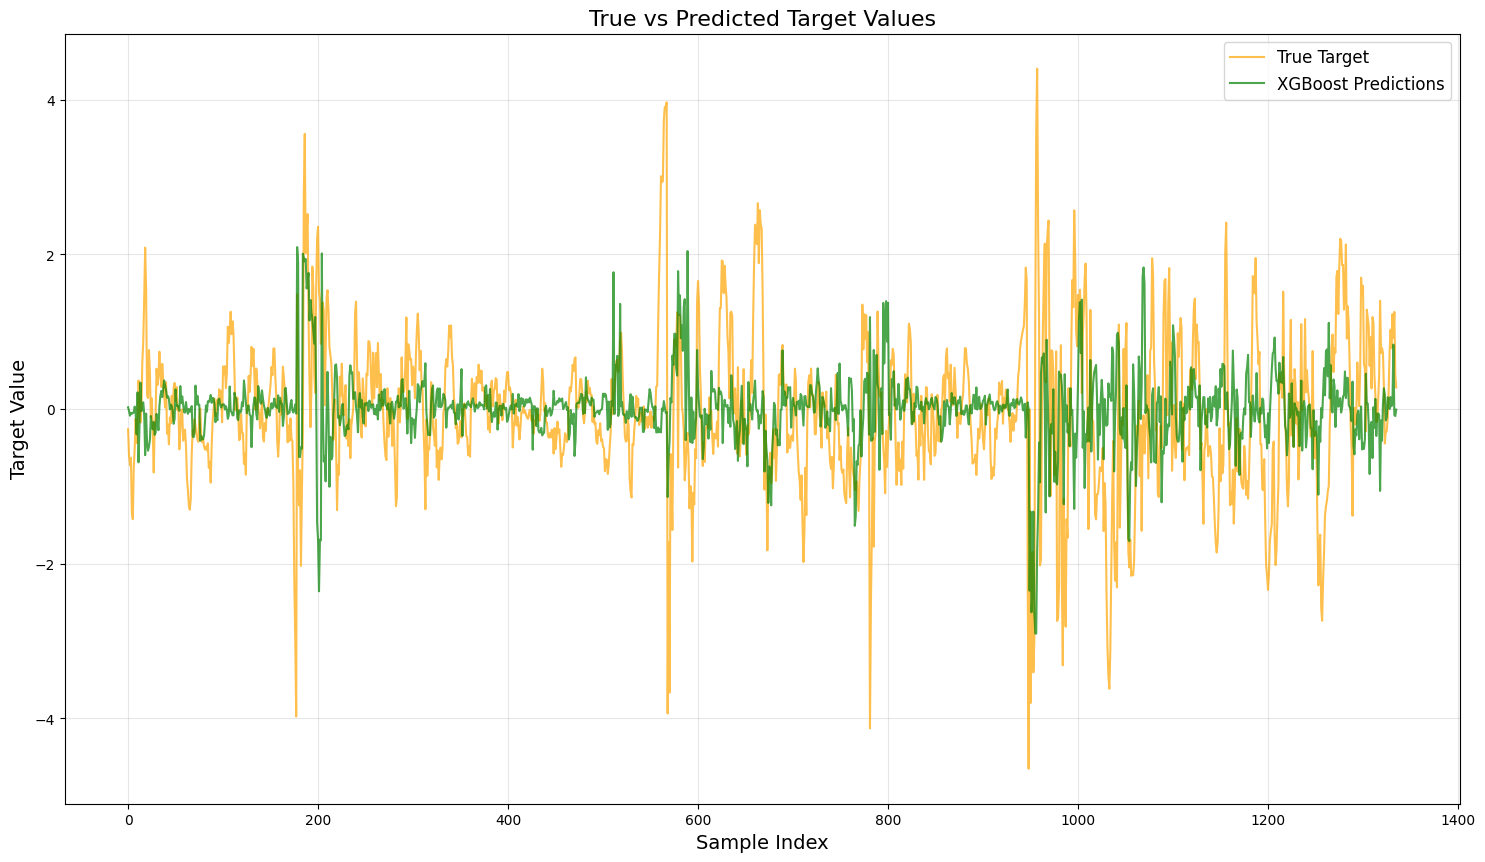

In [28]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(xgb_predictions, "values"):  # Handle pandas series
    xgb_predictions = xgb_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(xgb_predictions)), xgb_predictions, label="XGBoost Predictions",alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


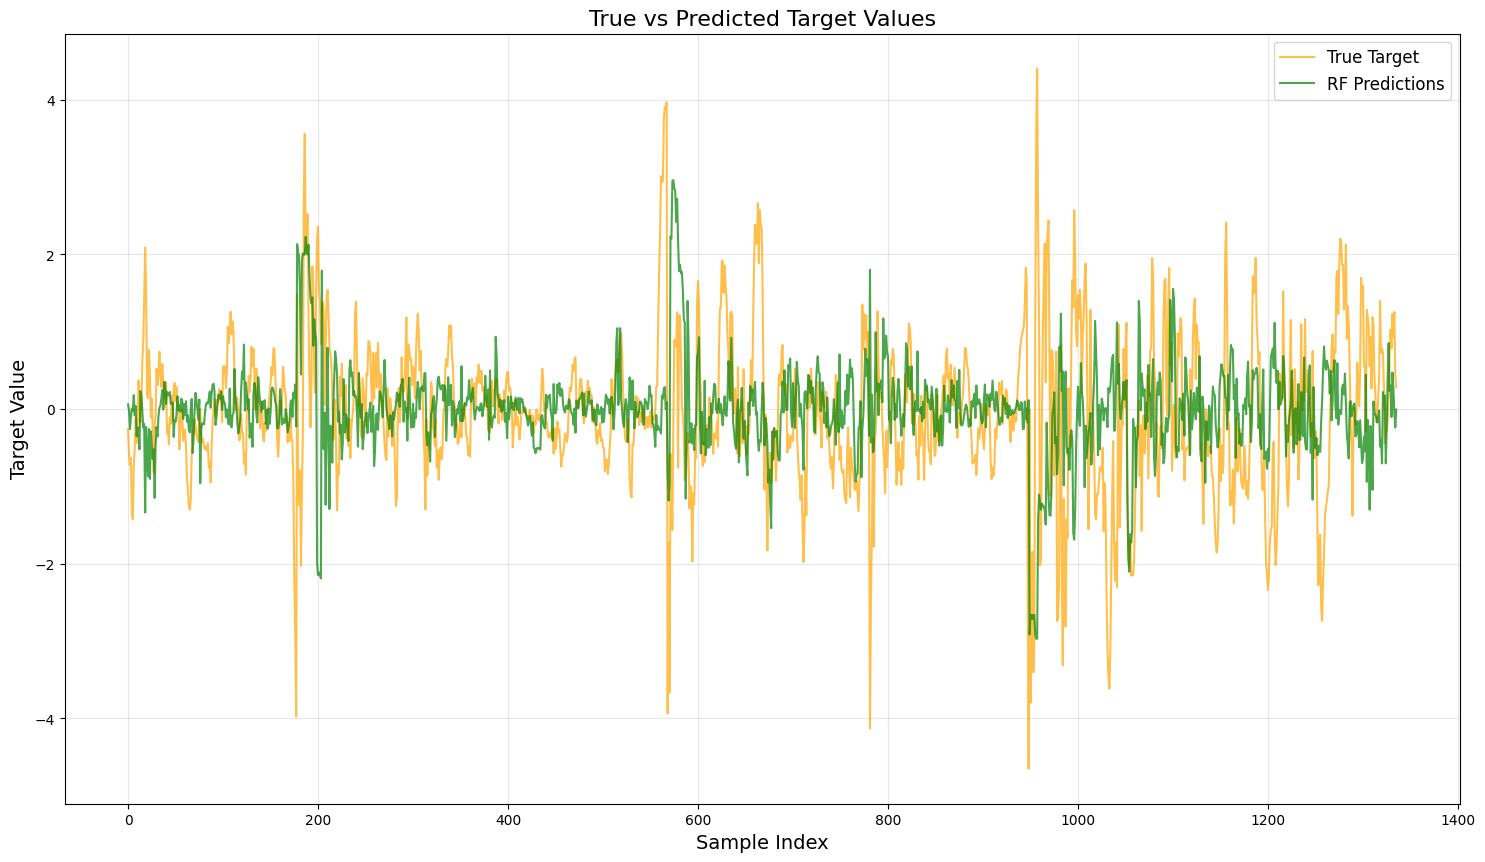

In [29]:
import matplotlib.pyplot as plt

# Ensure the inputs are properly aligned and in the same format
if hasattr(y_test, "values"):  # Handle pandas series
    y_test = y_test.values

if hasattr(rf_predictions, "values"):  # Handle pandas series
    rf_predictions = rf_predictions.values

# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(rf_predictions)), rf_predictions, label="RF Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


In [30]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"Random Forest R2 Score: {rf_r2}")
print(f"XGBoost R2 Score: {xgb_r2}")


Random Forest R2 Score: -0.3172773462992029
XGBoost R2 Score: -0.15821613167865167


**KNN**

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_regressor.fit(X_train, y_train)

# Predictions
y_pred = knn_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 1.2802
R² Score: -0.3402


**NN**

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(16, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer (single neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/200


/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0643 - val_loss: 0.7018
Epoch 2/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0916 - val_loss: 0.7081
Epoch 3/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0434 - val_loss: 0.7102
Epoch 4/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0343 - val_loss: 0.7281
Epoch 5/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0553 - val_loss: 0.7380
Epoch 6/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0421 - val_loss: 0.7307
Epoch 7/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0197 - val_loss: 0.7445
Epoch 8/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0113 - val_loss: 0.7605
Epoch 9/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0116 - val_loss: 0.7495
Epoch 10/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0020 - val_loss: 0.7518
Epoch 11/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9879 - val_loss: 0.7525
Epoch 12/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**LSTM:**

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming df is already loaded and processed as in the previous steps

# Features and Target
features = df.drop(columns=['Target'])
target = df['Target']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the data for LSTM: reshape it into 3D array (samples, time_steps, features)
n_time_steps = 10  # The number of time steps (previous periods you want to use for prediction)
n_features = features_scaled.shape[1]

X = []
y = []

# Create time windows (samples) for the LSTM model
for i in range(n_time_steps, len(features_scaled)):
    X.append(features_scaled[i - n_time_steps:i])  # Collect previous n_time_steps rows
    y.append(target.iloc[i])  # The target value (next period's return)

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
split_index = int(len(X) * 0.75)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [34]:
# Building the LSTM model for regression
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting

model.add(LSTM(units=10, return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=False))  # ThirdLSTM layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))  # No activation for regression (linear output)

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/home/pedro/python_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 10)         │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 10)         │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291 (8.95 KB)

 Trainable params: 2,291 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.9559 - val_loss: 0.9995
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0272 - val_loss: 1.0249
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9340 - val_loss: 1.0559
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9868 - val_loss: 1.0675
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9186 - val_loss: 1.0809
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9725 - val_loss: 1.1062
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9635 - val_loss: 1.0916
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9523 - val_loss: 1.0850
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9544 - val_loss: 1.0536
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9710 - val_loss: 1.1011
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9558 - val_loss: 1.1116
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1374
Test Loss (MSE): 1.542477011680603
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error (RMSE): 1.241964982713175
R^2: -0.6128303386397431


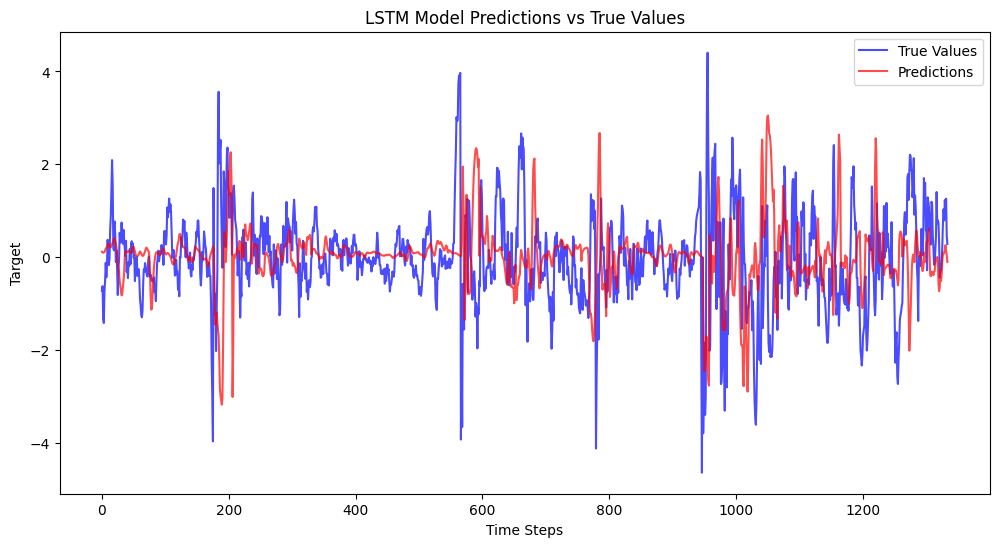

In [42]:
import matplotlib.pyplot as plt

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Predictions
y_pred_lstm = model.predict(X_test)

# Obliczanie metryk
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2 = r2_score(y_test, y_pred_lstm)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Prawdziwe wartości
plt.plot(y_test, label='True Values', color='blue', alpha=0.7)

# Przewidywania
plt.plot(y_pred_lstm, label='Predictions', color='red', alpha=0.7)

plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Target')
plt.legend()
plt.show()


**SAVE MODELS**

In [43]:
import os
import joblib

# Ścieżka do katalogu 'models' poza obecnym katalogiem
models_dir = os.path.join('..', 'models')

# Tworzenie katalogu, jeśli nie istnieje
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

joblib.dump(rf_model, os.path.join(models_dir, 'rf_model.pkl'))
joblib.dump(xgb_model, os.path.join(models_dir, 'xgb_model.pkl'))
joblib.dump(model, os.path.join(models_dir, 'lstm_model.pkl'))


['../models/lstm_model.pkl']

**GET AVERAGE FROM MODELS**

In [38]:
print(y_pred_lstm)

[[ 0.11141061]
 [ 0.09631941]
 [ 0.09232856]
 ...
 [ 0.13103822]
 [ 0.03396007]
 [-0.10606196]]


In [44]:
y_pred_lstm_flat = [item[0] for item in y_pred_lstm]
# Find the minimum length of the arrays
min_length = min(len(rf_predictions), len(xgb_predictions), len(y_pred_lstm_flat))

# Truncate all arrays to the same length
rf_predictions = rf_predictions[:min_length]
xgb_predictions = xgb_predictions[:min_length]
y_pred_lstm_flat = y_pred_lstm_flat[:min_length]
y_test = y_test[:min_length]  # If plotting or evaluation involves y_test

print(y_pred_lstm_flat)
# Compute the averaged predictions
predictions = (rf_predictions + xgb_predictions + y_pred_lstm_flat) / 3

# Verify the result
print(predictions)


[np.float32(0.11141061), np.float32(0.09631941), np.float32(0.092328556), np.float32(0.09574671), np.float32(0.103988744), np.float32(0.14403237), np.float32(0.17793696), np.float32(0.19663261), np.float32(0.22048588), np.float32(0.2750016), np.float32(0.28676164), np.float32(0.2639915), np.float32(0.2337619), np.float32(0.21082245), np.float32(0.21005061), np.float32(0.23914334), np.float32(0.2813952), np.float32(0.31124252), np.float32(0.35546878), np.float32(0.39801887), np.float32(0.39887774), np.float32(0.33410776), np.float32(0.28477025), np.float32(0.19627911), np.float32(0.0072948253), np.float32(-0.14770964), np.float32(-0.22981276), np.float32(-0.31735808), np.float32(-0.5297105), np.float32(-0.62346214), np.float32(-0.7370194), np.float32(-0.82925904), np.float32(-0.8055834), np.float32(-0.6463697), np.float32(-0.52904505), np.float32(-0.343031), np.float32(0.009843922), np.float32(0.12329965), np.float32(0.113332815), np.float32(0.1057068), np.float32(0.10769999), np.float3

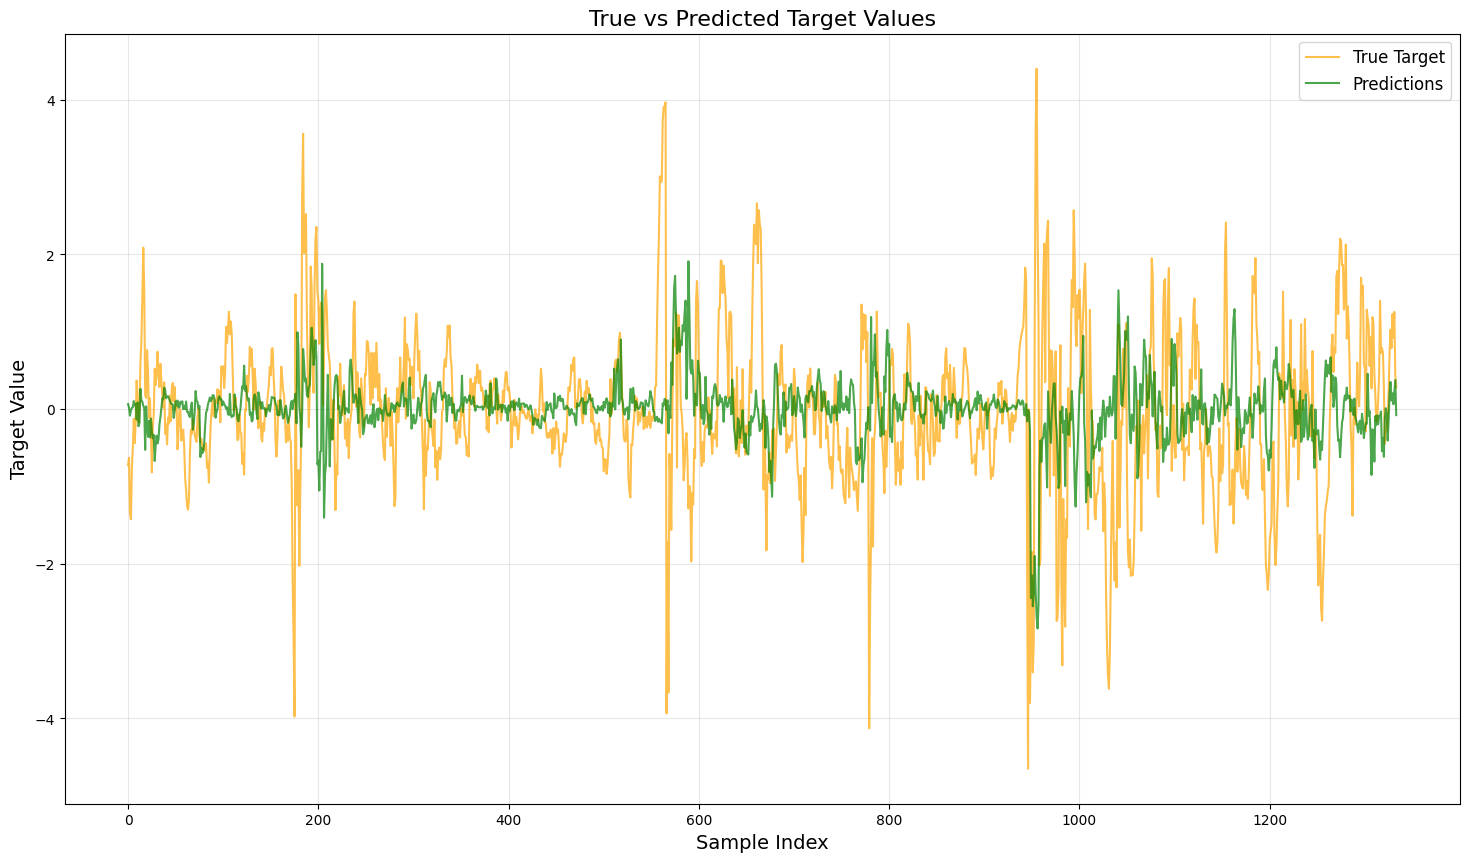

Root Mean Squared Error (RMSE): 1.0627095472013333
R^2: -0.18086199819145077


In [45]:
# Visualize Predictions
plt.figure(figsize=(18, 10))

# Plot true target values
plt.plot(range(len(y_test)), y_test, label="True Target", alpha=0.7, color='orange')

# Plot XGBoost predictions
plt.plot(range(len(predictions)), predictions, label="Predictions", alpha=0.7, color='green')

# Title and labels
plt.title("True vs Predicted Target Values", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Target Value", fontsize=14)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2: {r2}')


**FINAL PREDICTIONS**

In [41]:
predictions

array([ 0.06524703,  0.01871651, -0.08363914, ...,  0.2284679 ,
        0.37654956, -0.07707854])